# Day 3

In [86]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


**Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)**

In [20]:
numeric = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=[object])

**Use seaborn library to construct distribution plots for the numerical variables**

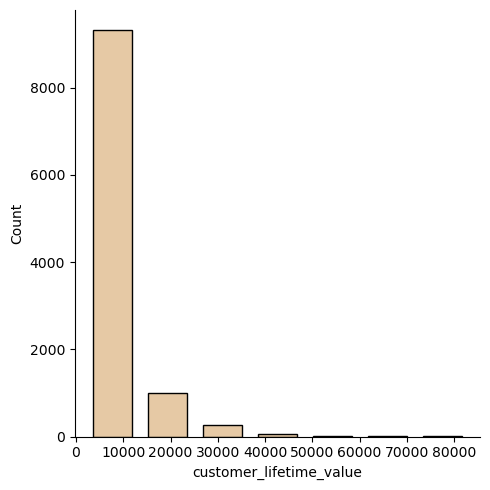

In [89]:
lifetime_plot = sns.displot(numeric, x='customer_lifetime_value', bins=7, shrink=.7, color='burlywood')

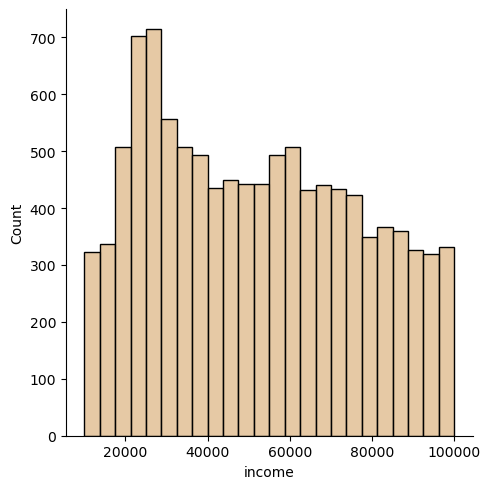

In [90]:
income_plot = sns.displot(numeric, x='income', color='burlywood')

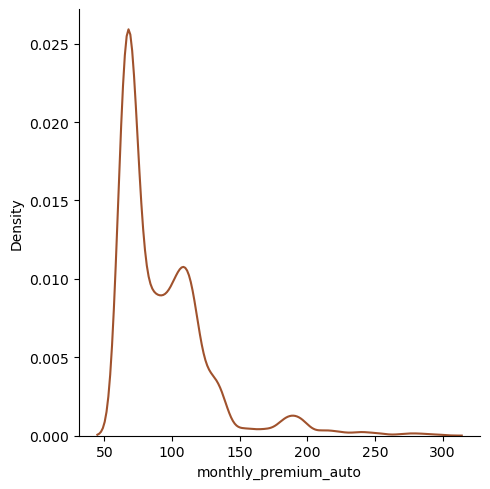

In [92]:
monthly_premium_plot = sns.displot(numeric, x='monthly_premium_auto', kind='kde', color='sienna')

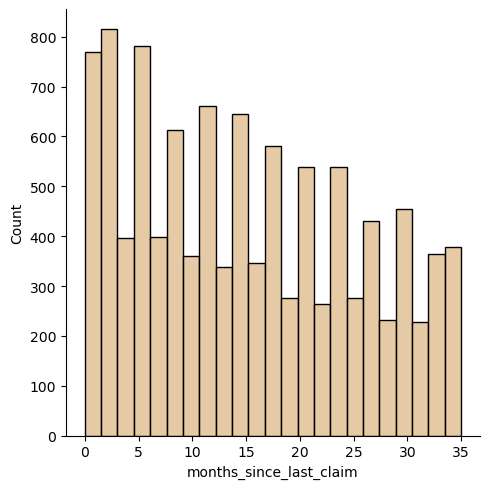

In [93]:
months_since_claim_plot = sns.displot(numeric, x='months_since_last_claim', color='burlywood')

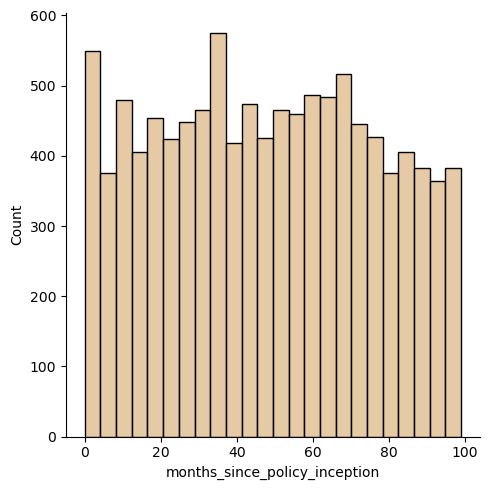

In [94]:
months_since_inception = sns.displot(numeric, x='months_since_policy_inception', color='burlywood')

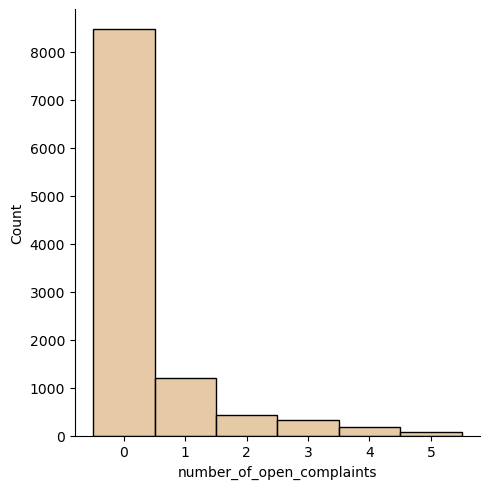

In [95]:
open_complaints_plot = sns.displot(numeric, x='number_of_open_complaints', discrete=True, color='burlywood')

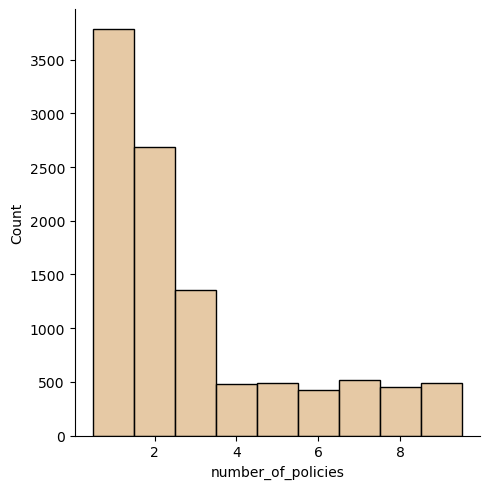

In [96]:
policies_num_plot = sns.displot(numeric, x='number_of_policies', discrete=True, color='burlywood')

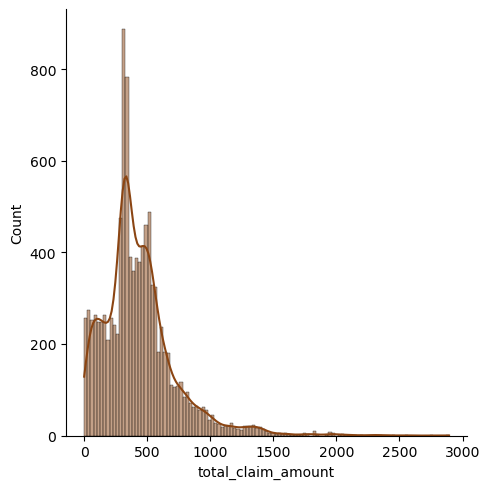

In [99]:
total_claims_plot = sns.displot(numeric, x='total_claim_amount', kde=True, color='saddlebrown')

**Use Matplotlib to construct histograms.**

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

In [29]:
numeric['income']

0        48029
1        92260
2        22139
3        49078
4        23675
         ...  
10684    61541
10685    61146
10686    39837
10687    64195
10688    68942
Name: income, Length: 10689, dtype: int64

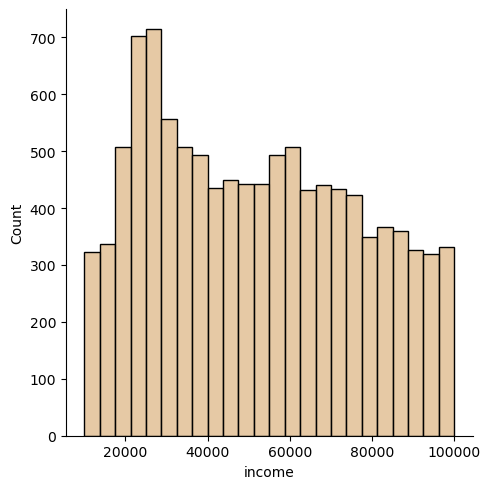

In [100]:
income_plot = sns.displot(numeric, x='income', color='burlywood')

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

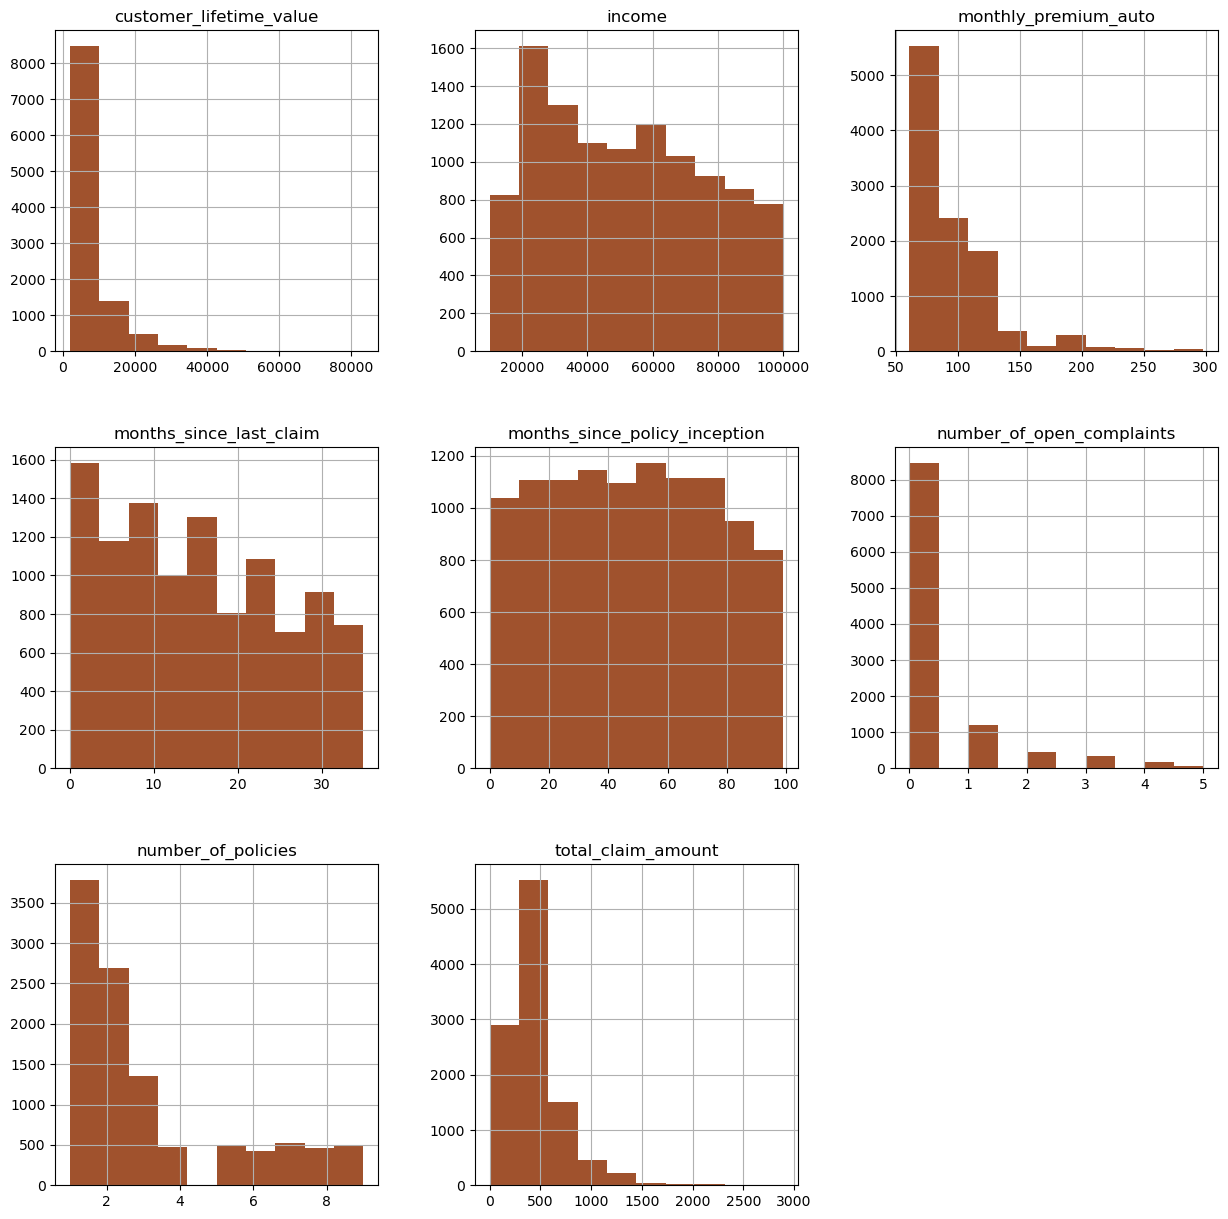

In [102]:
numeric.hist(figsize=(15,15), color='sienna')

**For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.**

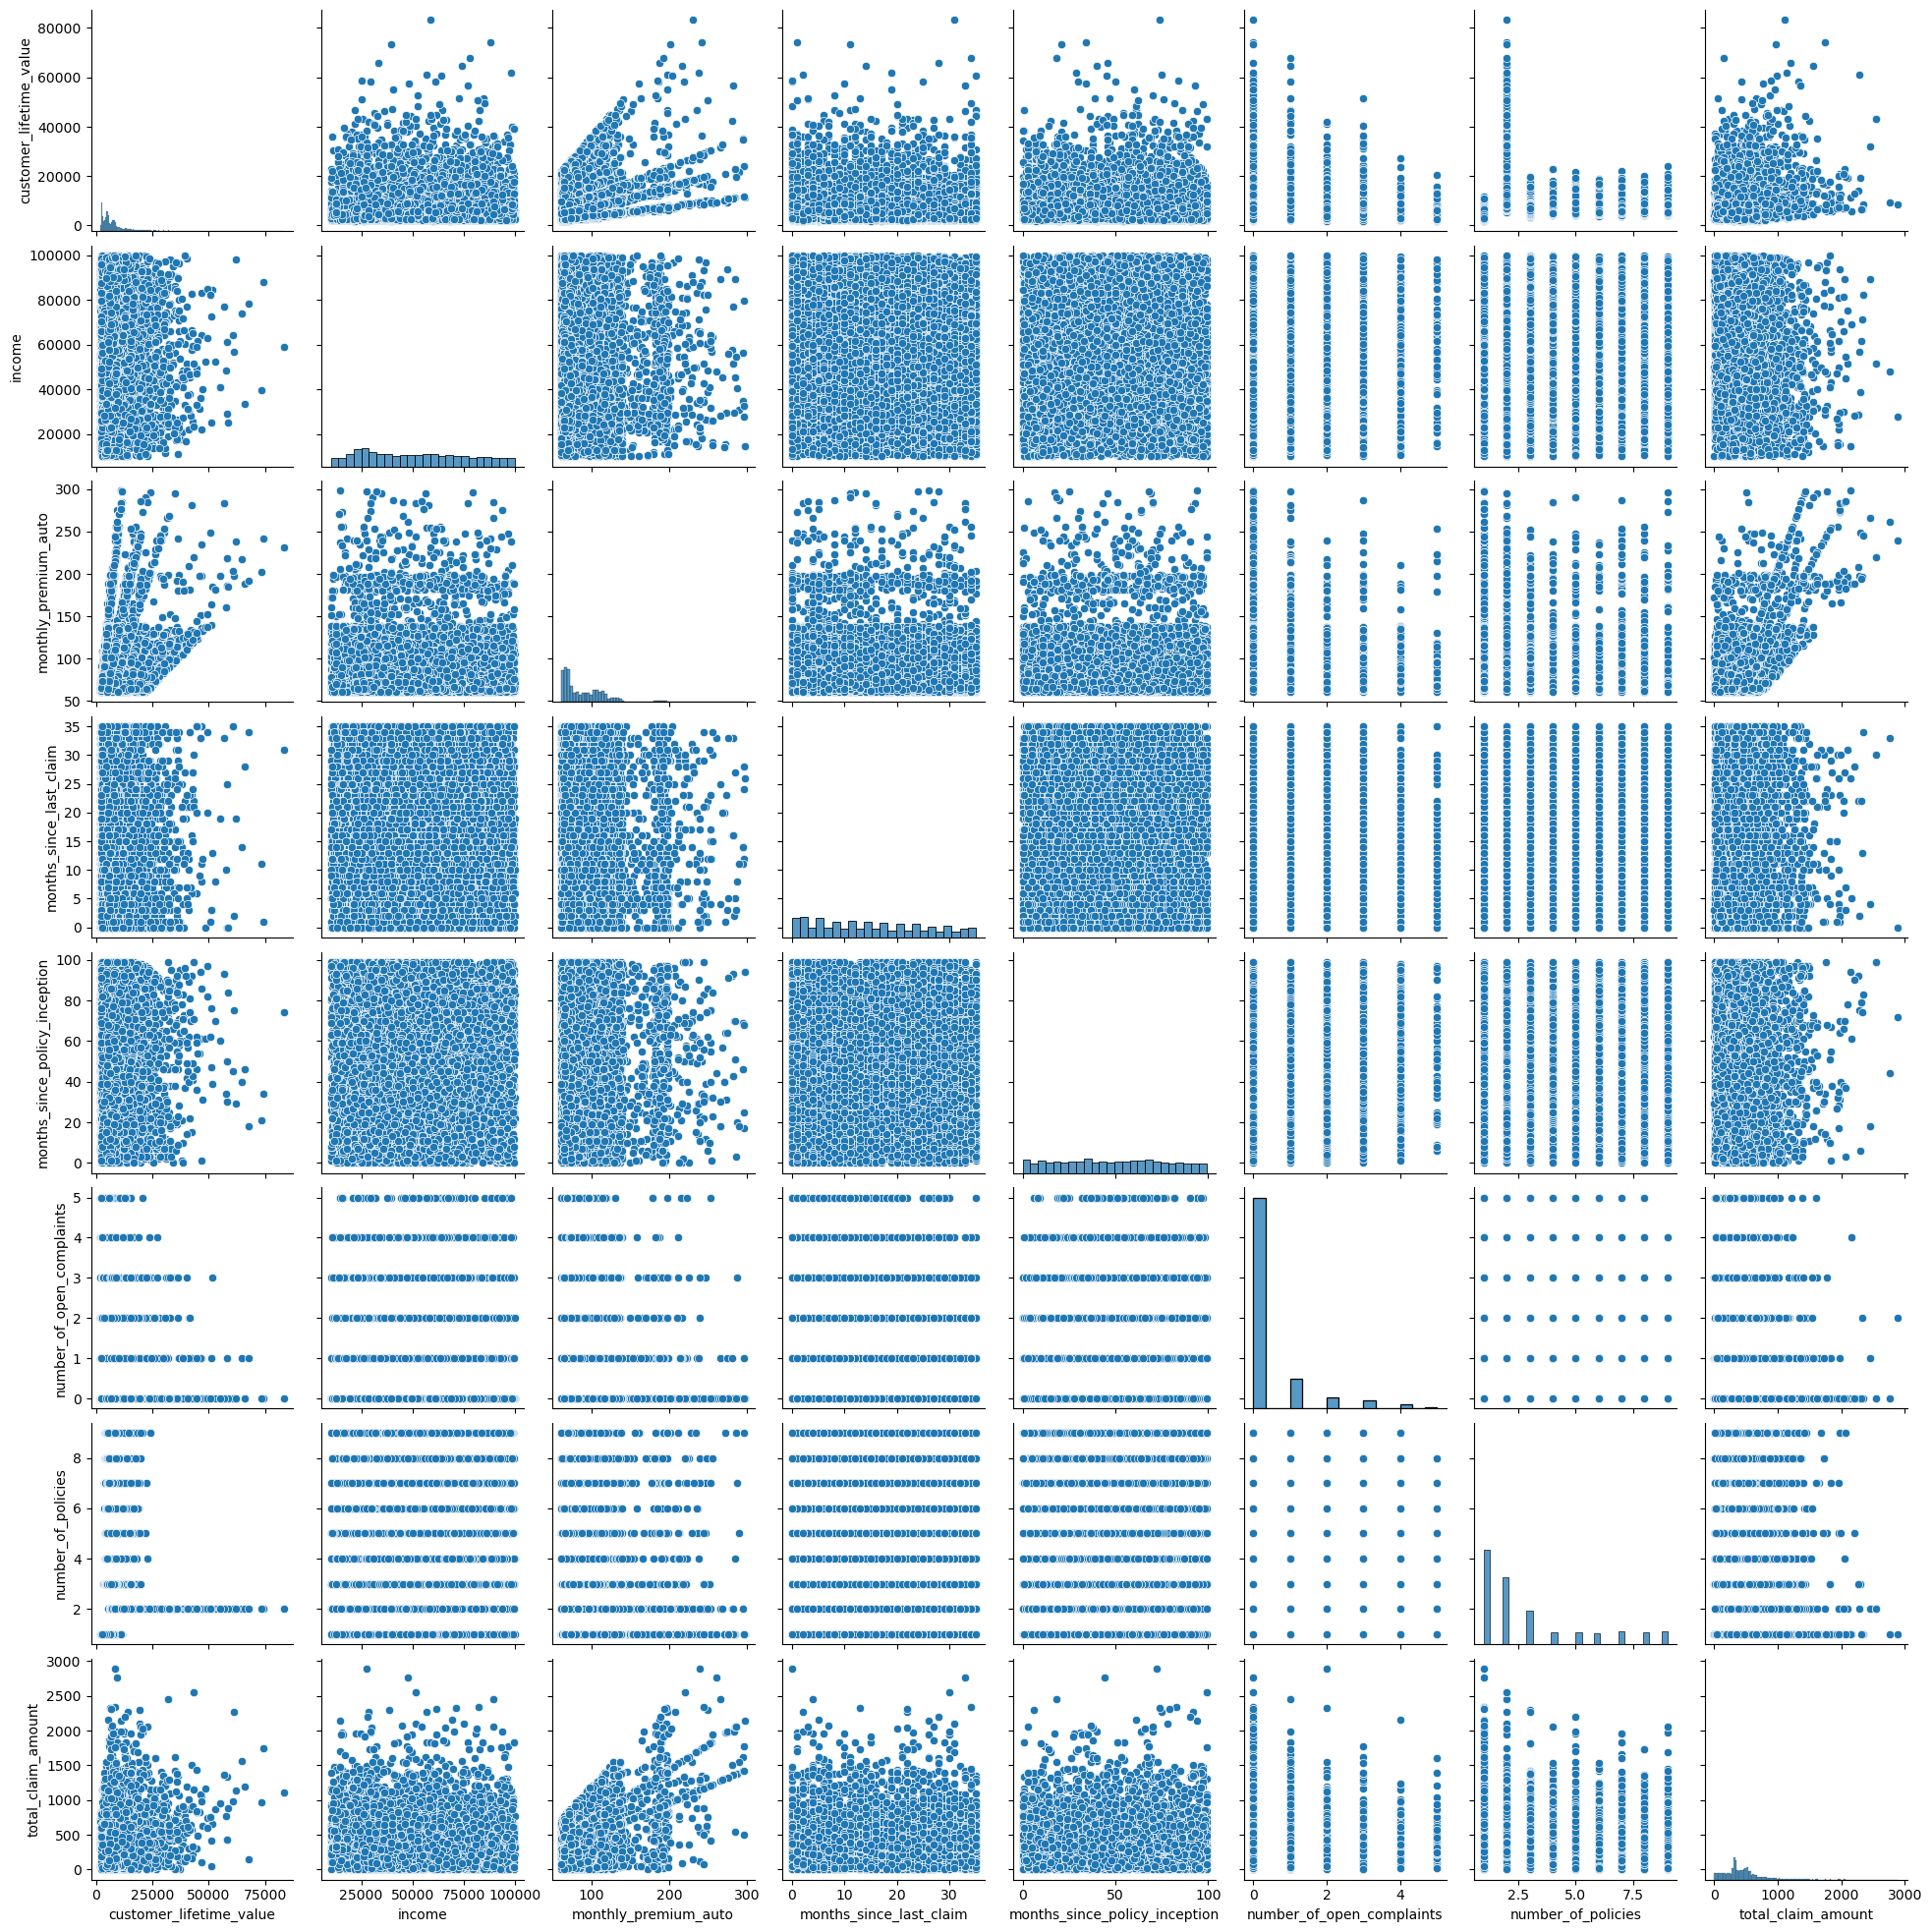

In [107]:
sns.pairplot(numeric)

**Plot the Correlation Heatmap.**

<AxesSubplot:>

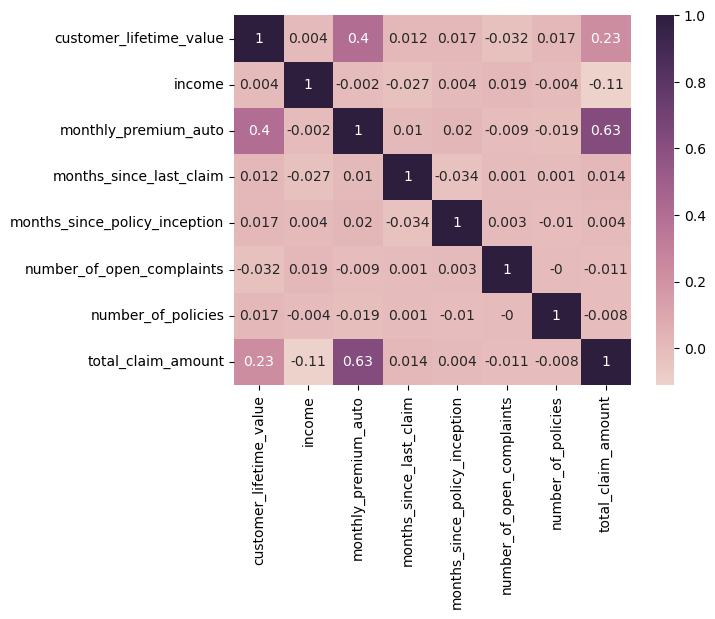

In [110]:
sns.heatmap(numeric.corr().round(3), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

**(Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.**

In [34]:
#no correlation >= 0.9

# Day 4

**Show a plot of the total number of responses.**

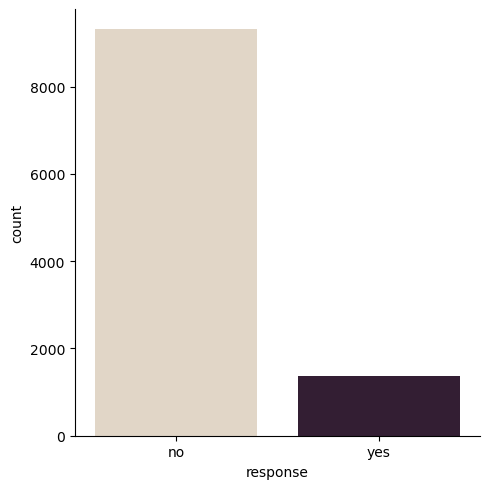

In [44]:
sns.catplot(data=categorical, x='response', kind='count', palette="ch:.25")

**Show a plot of the response by the sales channel.**

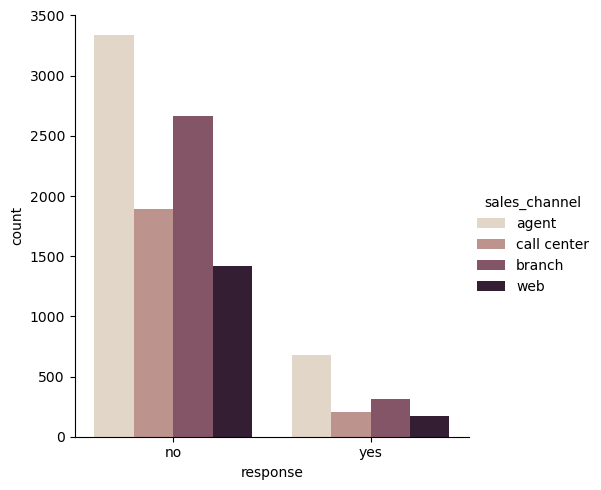

In [45]:
sns.catplot(data=categorical, x='response', hue='sales_channel', kind='count', palette="ch:.25")

**Show a plot of the response by the total claim amount.**

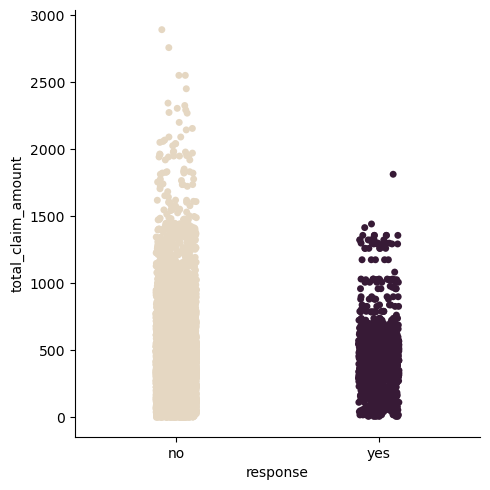

In [226]:
sns.catplot(data=df, x='response', y='total_claim_amount', palette="ch:.25")

**Show a plot of the response by income.**

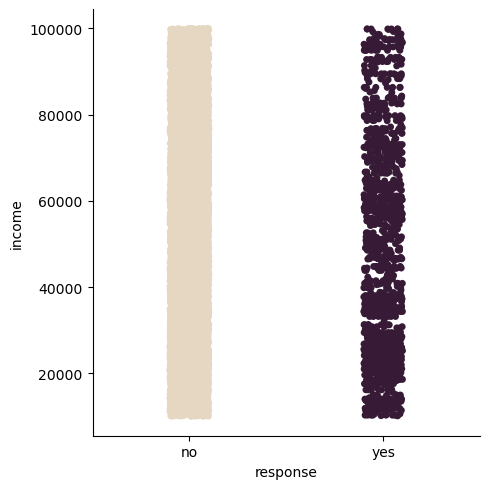

In [80]:
sns.catplot(data=df, x='response', y='income', palette="ch:.25")

**(Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.**

* **the strongest positive correlation of total claim amount is with monthly premium auto (.63). The higher the premium the more claims are made**

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

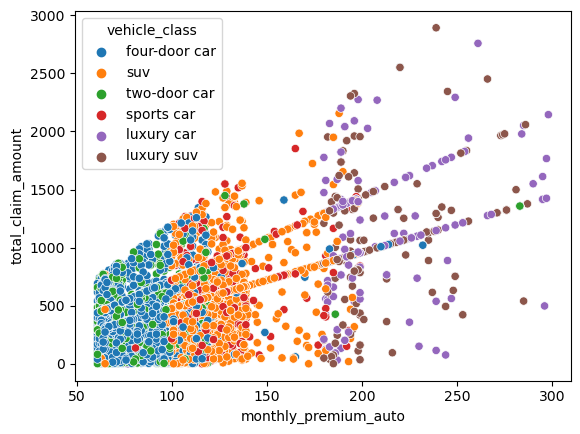

In [139]:
sns.scatterplot(data=df, x='monthly_premium_auto', y='total_claim_amount', hue='vehicle_class')

* **customer lifetime value has its lowest value in the east region; with the rest being relatively equal**

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Count'>

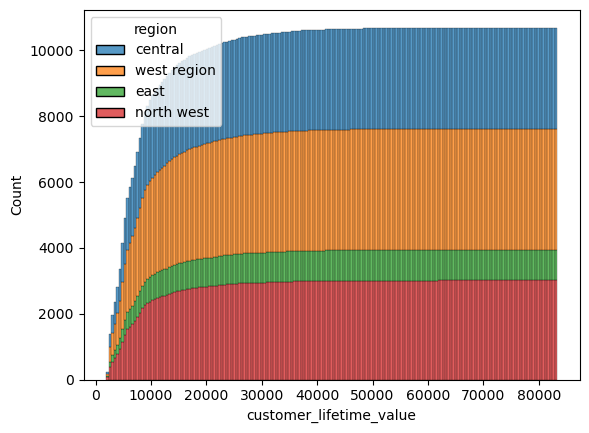

In [221]:
sns.histplot(data=df, x='customer_lifetime_value', hue='region', cumulative=True, multiple='stack')

In [204]:
#total customer lifetime value of the east region

df.loc[df['region'] == 'east',['customer_lifetime_value']].sum(axis=0)

customer_lifetime_value    7273378
dtype: int64

* **the highest customer value is of personal auto owners**

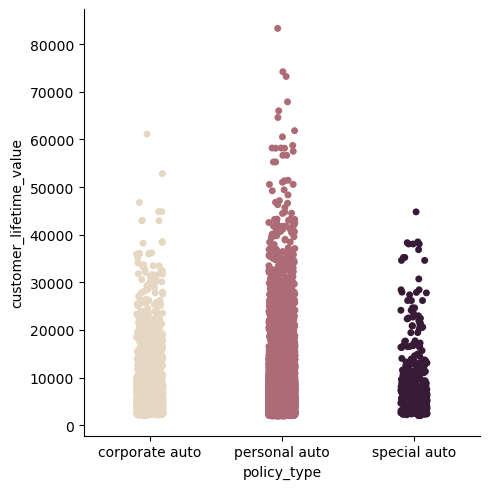

In [235]:
sns.catplot(data=df, x='policy_type', y='customer_lifetime_value', palette="ch:.25")

* **customer value is relatively equal for all types of coverage**

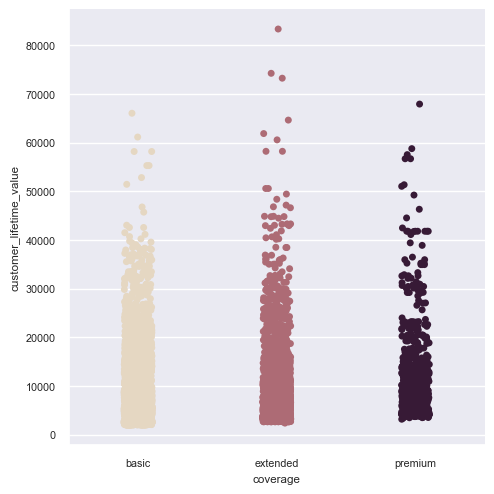

In [247]:
sns.catplot(data=df, x='coverage', y='customer_lifetime_value', palette="ch:.25")

* **customers with doctor and master level of education have the least customer lifetime value**

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Count'>

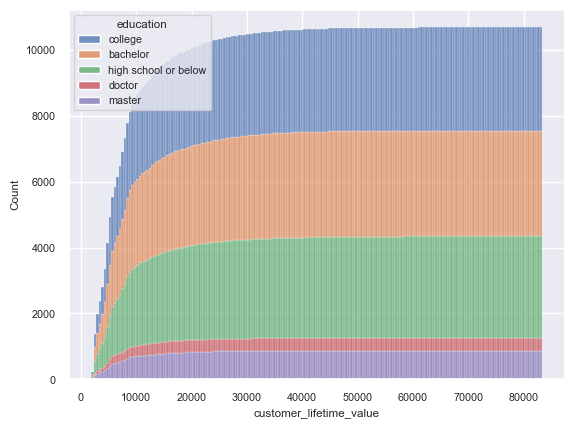

In [250]:
sns.set(font_scale=.7)
sns.histplot(data=df, x='customer_lifetime_value', hue='education', cumulative=True, multiple='stack')